In [196]:
import matplotlib.pyplot as plt
# Import the required libraries

import pandas as pd
#from tensorflow import keras
#from keras import layers
#import matplotlib.pyplot as plt
#from keras.callbacks import TensorBoard

In [197]:
# Set up tensorboard
%load_ext tensorboard
import datetime
log_folder = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [198]:
# Load in label info

train_data_label = pd.read_excel("data/Train_data_label.xlsx")
test_data_label = pd.read_excel("data/Test_data_label.xlsx")

In [199]:
train_data_label.head()

,ClassId,Path
0,20,Train/20/00020_00000_00000.png
1,20,Train/20/00020_00000_00001.png
2,20,Train/20/00020_00000_00002.png
3,20,Train/20/00020_00000_00003.png
4,20,Train/20/00020_00000_00004.png


In [200]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = "data/Train"
test_dir = "data/Test"

train_images = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_dir,
    class_mode="categorical",
    target_size=(30,30),
    batch_size=32)

Found 39209 images belonging to 43 classes.


In [201]:
from keras import utils
import numpy as np
import os
from tqdm.auto import tqdm


def read_images(dataframe):

    dataframe.dropna(inplace=True)
    pbar = tqdm(total=dataframe.shape[0])

    color_images = []
    grayscale_images = []

    for index, row in dataframe.iterrows():
        #print(index)
        colored_image = utils.load_img(os.path.join("data", row["Path"]), target_size=(30,30), color_mode="rgb")
        grayscale_image = utils.load_img(os.path.join("data", row["Path"]), target_size=(30,30), color_mode="grayscale")

        #np.asarray() is redudant but i put it in in case that was the issue on why the code isn't working. It isn't. :(
        color_images.append(np.asarray(utils.img_to_array(colored_image), dtype="float32"))
        grayscale_images.append(np.asarray(utils.img_to_array(grayscale_image), dtype="float32"))

        pbar.update(1)

    print("Loading complete, updating dataframe...")
    dataframe["color_img_arr"] = color_images
    dataframe["grayscale_img_arr"] = grayscale_images
    print("Done.")

    pbar.close()
    return

In [202]:
read_images(train_data_label)
read_images(test_data_label)

  0%|          | 0/39209 [00:00<?, ?it/s]

Loading complete, updating dataframe...
Done.


  0%|          | 0/12630 [00:00<?, ?it/s]

Loading complete, updating dataframe...
Done.


In [203]:
train_data_label.head()

,ClassId,Path,color_img_arr,grayscale_img_arr
0,20,Train/20/00020_00000_00000.png,"[[[46.0, 51.0, 56.0], [48.0, 51.0, 56.0], [50....","[[[50.0], [51.0], [51.0], [58.0], [78.0], [78...."
1,20,Train/20/00020_00000_00001.png,"[[[47.0, 50.0, 55.0], [49.0, 50.0, 55.0], [50....","[[[50.0], [50.0], [50.0], [51.0], [52.0], [51...."
2,20,Train/20/00020_00000_00002.png,"[[[51.0, 50.0, 57.0], [51.0, 51.0, 60.0], [50....","[[[51.0], [52.0], [51.0], [51.0], [51.0], [52...."
3,20,Train/20/00020_00000_00003.png,"[[[49.0, 49.0, 54.0], [49.0, 50.0, 55.0], [48....","[[[50.0], [50.0], [50.0], [49.0], [49.0], [48...."
4,20,Train/20/00020_00000_00004.png,"[[[50.0, 50.0, 55.0], [51.0, 50.0, 56.0], [51....","[[[51.0], [51.0], [50.0], [49.0], [49.0], [50...."


In [204]:
# Create the mapping from class number to class name
class_names = {
    0: 'Speed limit (20km/h)',
    1: 'Speed limit (30km/h)',
    2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)',
    4: 'Speed limit (70km/h)',
    5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)',
    7: 'Speed limit (100km/h)',
    8: 'Speed limit (120km/h)',
    9: 'No passing',
    10: 'No passing vehicle over 3.5 tons',
    11: 'Right-of-way at the intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Vehicle > 3.5 tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve left',
    20: 'Dangerous curve right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End speed + passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End no passing vehicle > 3.5 tons'
}

In [205]:
# Plot the bar chart of classes from the train and test data by replacing the numbers with actual class names in the graph
train_class_names = train_data_label.replace({"ClassId": class_names})
test_class_names = test_data_label.replace({"ClassId": class_names})

In [206]:
train_data_label.head()

,ClassId,Path,color_img_arr,grayscale_img_arr
0,20,Train/20/00020_00000_00000.png,"[[[46.0, 51.0, 56.0], [48.0, 51.0, 56.0], [50....","[[[50.0], [51.0], [51.0], [58.0], [78.0], [78...."
1,20,Train/20/00020_00000_00001.png,"[[[47.0, 50.0, 55.0], [49.0, 50.0, 55.0], [50....","[[[50.0], [50.0], [50.0], [51.0], [52.0], [51...."
2,20,Train/20/00020_00000_00002.png,"[[[51.0, 50.0, 57.0], [51.0, 51.0, 60.0], [50....","[[[51.0], [52.0], [51.0], [51.0], [51.0], [52...."
3,20,Train/20/00020_00000_00003.png,"[[[49.0, 49.0, 54.0], [49.0, 50.0, 55.0], [48....","[[[50.0], [50.0], [50.0], [49.0], [49.0], [48...."
4,20,Train/20/00020_00000_00004.png,"[[[50.0, 50.0, 55.0], [51.0, 50.0, 56.0], [51....","[[[51.0], [51.0], [50.0], [49.0], [49.0], [50...."


<AxesSubplot:>

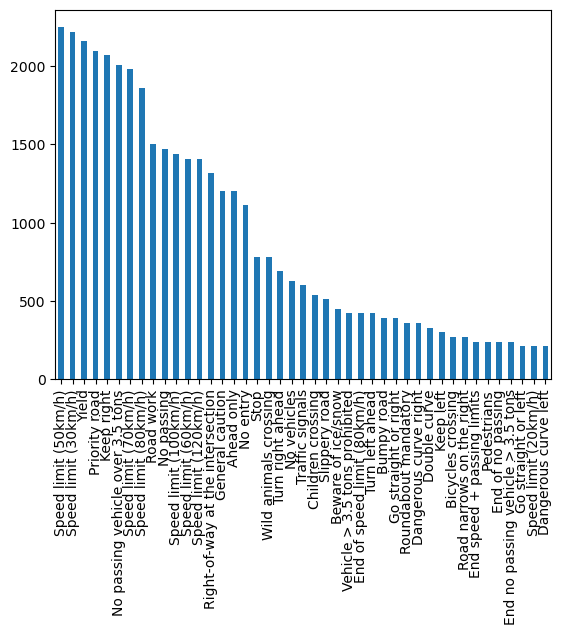

In [207]:
# Plot the bar chart
train_class_names["ClassId"].value_counts().plot(kind="bar")

<AxesSubplot:>

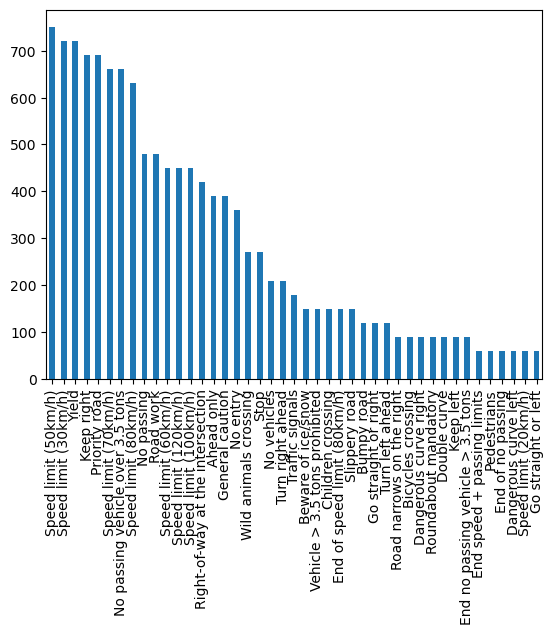

In [208]:
test_class_names["ClassId"].value_counts().plot(kind="bar")

In [209]:
# Looks good, update the dataframes with the new value mapping:
train_data_label = train_class_names
test_data_label = test_class_names

In [210]:
import tensorflow as tf
from keras import layers

FILTER_COUNT = 32
FILTER_SIZE = (3,3) # 3x3 filters

# >5 epochs
# Grayscale uses 32x32x(1 brightness layer)
# Colored uses 32x32x(3 layers [R, G, B])

# Create the model (feel free to change the order and type of layers)
grayscale_model = tf.keras.models.Sequential()
grayscale_model.add(layers.Conv2D(FILTER_COUNT, FILTER_SIZE, activation='relu', input_shape=(30,30,1)))
grayscale_model.add(layers.Conv2D(FILTER_COUNT, FILTER_SIZE, activation='relu', input_shape=(30,30,1)))
grayscale_model.add(layers.MaxPooling2D(pool_size=(2,2)))
grayscale_model.add(layers.Dropout(0.1)) # percentage of random neurons that are dropped each epoch

grayscale_model.add(layers.Dense(256, activation='relu')) # Remove this line if it's not helping
grayscale_model.add(layers.Dropout(0.5)) # Remove this line if it's not helping
grayscale_model.add(layers.Dense(8, activation='softmax')) # 8 neurons for 32/4

# Use ADAM optimizer
LEARNING_RATE = 0.1 # Try 0.001 next

adam = tf.keras.optimizers.Adam(
    learning_rate=LEARNING_RATE
)

grayscale_model.compile(loss="binary_crossentropy", optimizer=adam)

In [211]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2) # change monitor to val_accuracy if this doesn't work

In [212]:
train_class_names.head()

,ClassId,Path,color_img_arr,grayscale_img_arr
0,Dangerous curve right,Train/20/00020_00000_00000.png,"[[[46.0, 51.0, 56.0], [48.0, 51.0, 56.0], [50....","[[[50.0], [51.0], [51.0], [58.0], [78.0], [78...."
1,Dangerous curve right,Train/20/00020_00000_00001.png,"[[[47.0, 50.0, 55.0], [49.0, 50.0, 55.0], [50....","[[[50.0], [50.0], [50.0], [51.0], [52.0], [51...."
2,Dangerous curve right,Train/20/00020_00000_00002.png,"[[[51.0, 50.0, 57.0], [51.0, 51.0, 60.0], [50....","[[[51.0], [52.0], [51.0], [51.0], [51.0], [52...."
3,Dangerous curve right,Train/20/00020_00000_00003.png,"[[[49.0, 49.0, 54.0], [49.0, 50.0, 55.0], [48....","[[[50.0], [50.0], [50.0], [49.0], [49.0], [48...."
4,Dangerous curve right,Train/20/00020_00000_00004.png,"[[[50.0, 50.0, 55.0], [51.0, 50.0, 56.0], [51....","[[[51.0], [51.0], [50.0], [49.0], [49.0], [50...."


In [213]:
type(train_class_names.iloc[0,3])

numpy.ndarray

In [214]:
grayscale_data = {
    "X_train": train_data_label["grayscale_img_arr"],
    "y_train": train_data_label["ClassId"],
    "X_test": test_data_label["grayscale_img_arr"],
    "y_test": test_data_label["ClassId"]
}

history = grayscale_model.fit(
    grayscale_data["X_train"],
    grayscale_data["y_train"],
    epochs=5,
    validation_data=(grayscale_data["X_test"], grayscale_data["y_test"]),
    callbacks=[early_stop]
)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).